# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos:  JOSE FERNANDO SARMIENTO SARMIENTO<br>
Url: https://github.com/JFSS20000/SEMINARIO<br>
Problema:
> 1. Sesiones de doblaje <br>

Descripción del problema:<br>

Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de grabación independientemente del número de tomas que se graben. No es posible grabar más de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los
servicios de los actores de doblaje sea el menor posible. Los datos son:<br>

Número de actores: 10<br>
Número de tomas : 30<br>
Actores/Tomas : https://raw.githubusercontent.com/JFSS20000/SEMINARIO/refs/heads/main/Datos%20problema%20doblaje(30%20tomas%2C%2010%20actores)%20-%20Hoja%201.csv<br>
- 1 indica que el actor participa en la toma<br>
- 0 en caso contrario<br>

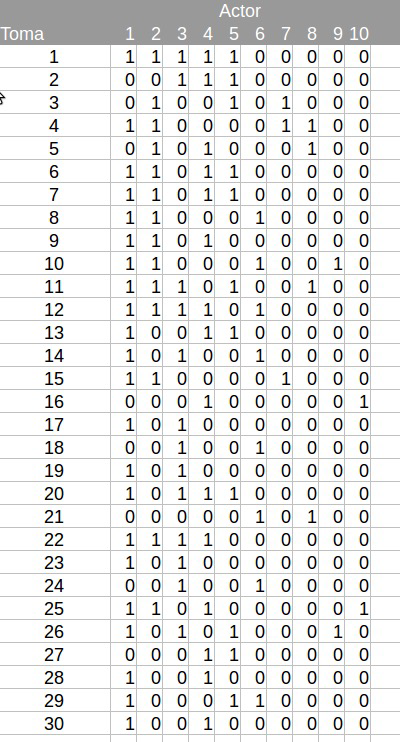

(*) La respuesta es obligatoria





                                        

In [42]:
import pandas as pd
from itertools import product

In [43]:
# Usar el archivo CSV de los datos
url = 'https://raw.githubusercontent.com/JFSS20000/SEMINARIO/refs/heads/main/Datos%20problema%20doblaje(30%20tomas%2C%2010%20actores)%20-%20Hoja%201.csv'
df = pd.read_csv(url)

# Se crea un nuevo data frame únicamente con el valor de los datos
filas = df.iloc[1:-2]           # quitando la primera y las dos últimas filas
columnas = filas.iloc[:, 1:-2]  # quitando la primera y las dos últimas columnas
df_datos = columnas

num_tomas = df_datos.shape[0]     # El número de tomas son las filas del data frame
num_actores = df_datos.shape[1]   # El número de actores son las columnas del data frame

print(f"Actores: {num_actores}")
print(f"Tomas: {num_tomas}")

Actores: 10
Tomas: 30


In [44]:
print(df_datos)

    Actor  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  \
1     1.0         1.0         1.0         1.0         1.0         0.0   
2     0.0         0.0         1.0         1.0         1.0         0.0   
3     0.0         1.0         0.0         0.0         1.0         0.0   
4     1.0         1.0         0.0         0.0         0.0         0.0   
5     0.0         1.0         0.0         1.0         0.0         0.0   
6     1.0         1.0         0.0         1.0         1.0         0.0   
7     1.0         1.0         0.0         1.0         1.0         0.0   
8     1.0         1.0         0.0         0.0         0.0         1.0   
9     1.0         1.0         0.0         1.0         0.0         0.0   
10    1.0         1.0         0.0         0.0         0.0         1.0   
11    1.0         1.0         1.0         0.0         1.0         0.0   
12    1.0         1.0         1.0         1.0         0.0         1.0   
13    1.0         0.0         0.0         1.0      

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones?




Respuesta

In [45]:
# ¿Cuantas posibilidades hay sin tener en cuenta las restricciones?
# - Si no hay restricciones, una toma puede ser asignada a cualquier actor. Las posibilidades totales son el número de actores elevado a la potencia del número de tomas.


posibilidades_sin_restriccion = num_actores ** num_tomas

print(f"Posibilidades sin restricciones: {posibilidades_sin_restriccion}")

Posibilidades sin restricciones: 1000000000000000000000000000000


In [46]:
# ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones?

array_datos = df_datos.values.astype(int)

# En array_datos[toma, actor] se considera:
# - 1 indica que el actor participa en la toma
# - 0 en caso contrario

toma_posible = []
for toma in range(num_tomas):
    actores_posibles = [actor for actor in range(num_actores) if array_datos[toma, actor] == 1]
    toma_posible.append(actores_posibles)

# Se calcula las posibilidades multiplicando los actores posibles por cada toma
posibilidades_con_restriccion = 1
for actores_posibles in toma_posible:
    posibilidades_con_restriccion *= len(actores_posibles)

print(f"Posibilidades con restricciones: {posibilidades_con_restriccion}")



Posibilidades con restricciones: 165112971264000


Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Respuesta

En este caso la estructura de datos que mejor se adapta es "**NumPy Array**" ya que permite representar la relación binaria de participar o no hacerlo (1/0) en una matriz bidimensional cuyas filas y columnas representan a las "tomas" y a los "actores".

Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

Respuesta

Se ha usado un modelo de "Programación Lineal Entera (PLE)", la función objetivo es:
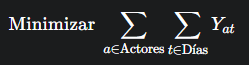

Donde:  
"Yat" es una variable binaria que toma el valor 1 si el actor a debe ir al estudio el día t, y 0 en caso contrario.

Es un problema de minimización.

Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

In [47]:
# Diseña un algoritmo para resolver el problema por fuerza bruta

def resolver_fuerza_bruta(array_datos):
    num_tomas = array_datos.shape[0]
    num_actores = array_datos.shape[1]

    # Encontrar los actores posibles para cada toma
    actores_por_toma = []
    for toma in range(num_tomas):
        actores_posibles = [actor for actor in range(num_actores) if array_datos[toma, actor] == 1]
        if not actores_posibles:
            # Si alguna toma no tiene actores posibles, no hay solución
            return float('inf'), None
        actores_por_toma.append(actores_posibles)

    # Generar todas las combinaciones posibles de asignaciones (una para cada toma)
    # El iterador product genera tuplas, donde cada elemento es un actor asignado a una toma.
    combinaciones_asignaciones = product(*actores_por_toma)

    costo_minimo = float('inf')
    mejor_asignacion = None

    # Iterar sobre todas las asignaciones posibles
    for asignacion in combinaciones_asignaciones:
        # 'assignment' es una tupla, donde assignment[i] es el actor asignado a la toma i

        # Calcular el costo de esta asignación
        # El costo es el número total de actores únicos que deben estar presentes.
        actores_necesarios = set(asignacion)
        costo_actual = len(actores_necesarios)

        # Actualizar el mejor costo y la mejor asignación si encontramos una mejor solución
        if costo_actual < costo_minimo:
            mejor_asignacion = costo_actual
            best_assignment = list(asignacion) # Convertir la tupla a lista para consistencia

    return costo_minimo, mejor_asignacion

# Ejecutar el algoritmo de fuerza bruta
costo_minimo_FB, menor_asignacion_FB = resolver_fuerza_bruta(array_datos)

if menor_asignacion_FB is not None:
    print("\nResultados de la fuerza bruta:")
    print(f"Costo mínimo encontrado: {costo_minimo_FB} actores")
    print(f"Mejor asignación (actor por toma): {menor_asignacion_FB}")
else:
    print("\nResultados de la fuerza bruta:")
    print("No se encontró una asignación factible.")



KeyboardInterrupt: 

Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta

(*)Calcula la complejidad del algoritmo

Respuesta

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

Aplica el algoritmo al juego de datos generado

Respuesta

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta